In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('ecommerce_data.csv', encoding = 'ISO-8859-1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [9]:
#Check out rows with missing values
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [10]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
#drop missing values
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


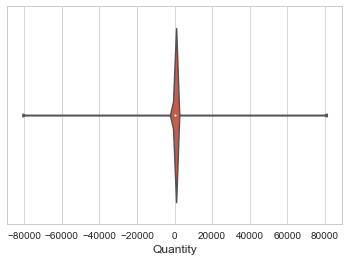

In [14]:
sns.set_style(style = "whitegrid")
ax = sns.violinplot(x=df['Quantity'])

In [15]:
#let's remove negative quantities
df = df[df.Quantity > 0]

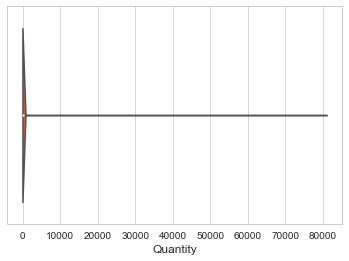

In [16]:
ax = sns.violinplot(x=df["Quantity"])

In [17]:
df['AmountSpent'] = df['Quantity']*df['UnitPrice']

In [18]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [19]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [20]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = pd.concat((getattr(df['InvoiceDate'].dt, i).rename(i) for i in L), axis=1)

In [21]:
df = df.join(pd.concat((getattr(df['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [22]:
df = pd.concat((df, df2), axis = 1)

In [23]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,...,dayofyear,weekofyear,quarter,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,...,335,48,4,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,...,335,48,4,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,...,335,48,4,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,...,335,48,4,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,...,335,48,4,2010,12,1,2,335,48,4


# Exploring and Analysing the Data 

In [24]:
# Consolidating the number of Sales made per customer for each country
# We use InvoiceNo as the count for sales

Sales_Cust_Cntry = df.groupby(by = ['CustomerID', 'Country'], as_index=False)['InvoiceNo'].agg({'Sales': 'count'}).sort_values('Sales', ascending = False)
orders = Sales_Cust_Cntry

In [25]:
orders

,CustomerID,Country,Sales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
...,...,...,...
605,13135,United Kingdom,1
643,13185,United Kingdom,1
3969,17763,United Kingdom,1
3962,17752,United Kingdom,1


In [26]:
#Visualizing no. of sales made per customer/country

In [27]:
df_salebycountry = orders.groupby( ['Country'], as_index=False)['Sales'].sum().sort_values('Sales', ascending = False)

Text(0.5, 1.0, 'Money spent by each customer')

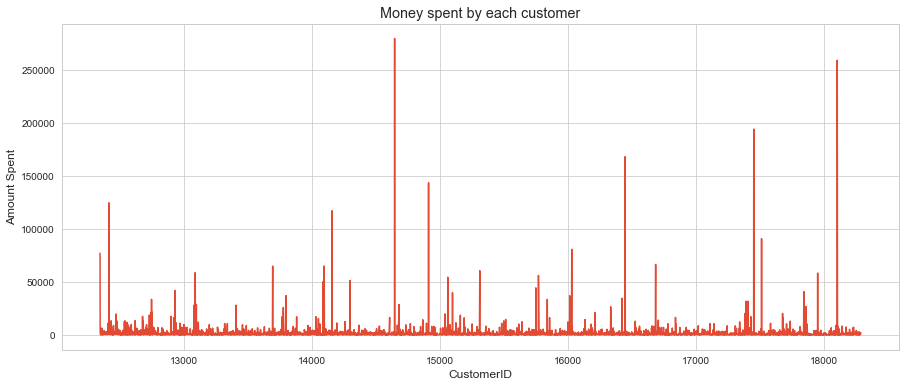

In [28]:
# Visualizing Money Spent for all customers

df.columns
money_spent = df.groupby(by=['CustomerID'])['AmountSpent'].sum().reset_index()
plt.subplots(figsize = (15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('CustomerID')
plt.ylabel('Amount Spent')
plt.title('Money spent by each customer')


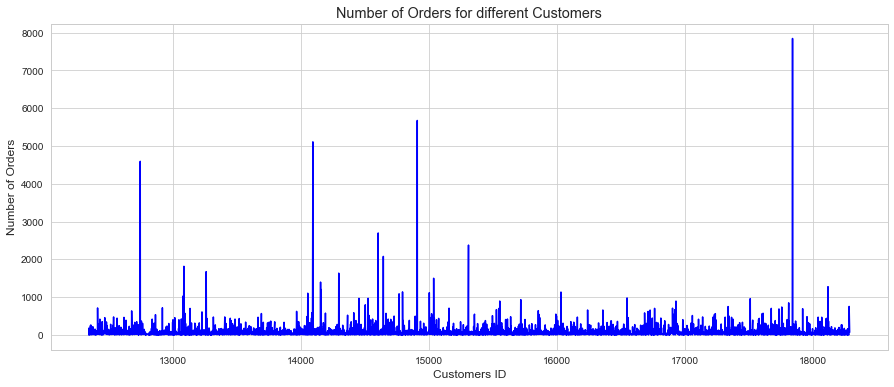

In [29]:
orders = df.groupby(by=['CustomerID','Country'])['InvoiceNo'].count().reset_index()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo, color = 'blue')
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')

plt.show()

# Purchasing Patterns

In [30]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,...,dayofyear,weekofyear,quarter,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,...,335,48,4,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,...,335,48,4,2010,12,1,2,335,48,4


In [31]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df.insert(loc = 2, column = 'year_month', value = df['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df.insert(loc = 5, column = 'hour', value = df.InvoiceDate.dt.hour)



In [32]:
# Check to see if our year_month and hour columns were made
df.head(3)

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,...,dayofyear,weekofyear,quarter,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,...,335,48,4,2010,12,1,2,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,...,335,48,4,2010,12,1,2,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,...,335,48,4,2010,12,1,2,335,48,4


[Text(0, 0, 'Dec_10'),
 Text(1, 0, 'Jan_11'),
 Text(2, 0, 'Feb_11'),
 Text(3, 0, 'Mar_11'),
 Text(4, 0, 'Apr_11'),
 Text(5, 0, 'May_11'),
 Text(6, 0, 'Jun_11'),
 Text(7, 0, 'Jul_11'),
 Text(8, 0, 'Aug_11'),
 Text(9, 0, 'Sep_11'),
 Text(10, 0, 'Oct_11'),
 Text(11, 0, 'Nov_11'),
 Text(12, 0, 'Dec_11')]

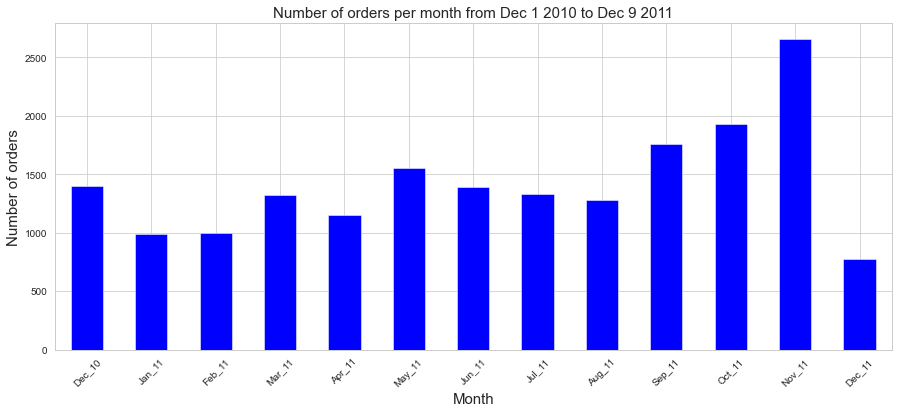

In [33]:
# Create a plot that shows the number of orders per month 
plt.subplots(figsize=(15,6))
ax1 = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',color = 'blue')
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_ylabel('Number of orders', fontsize = 15)
ax1.set_title('Number of orders per month from Dec 1 2010 to Dec 9 2011', fontsize = 15)
ax1.set_xticklabels(('Dec_10', 'Jan_11','Feb_11', 'Mar_11', 'Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation =45)

In [34]:
#Plotting number of orders by hour
df_hour = df[['hour', 'InvoiceNo', 'StockCode']]

In [35]:
df_hours = df.groupby(['InvoiceNo','hour'])['hour'].count()
plt.subplots(figsize=(15,8))
df_hours.plot(kind = 'bar', fontsize = 12)
plt.show()

<AxesSubplot:xlabel='InvoiceNo,hour'>

Error in callback <function flush_figures at 0x0000026909375940> (for post_execute):


KeyboardInterrupt: 

## Analysis by Country

<AxesSubplot:ylabel='Country'>

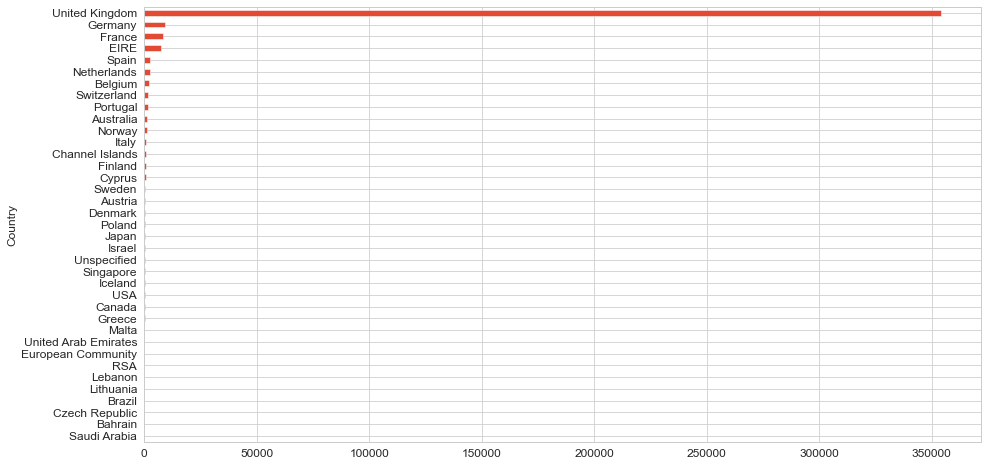

In [36]:
group_country = df.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country.plot(kind = 'barh', fontsize = 12)

Text(0.5, 1.0, 'Quantity spent country wise')

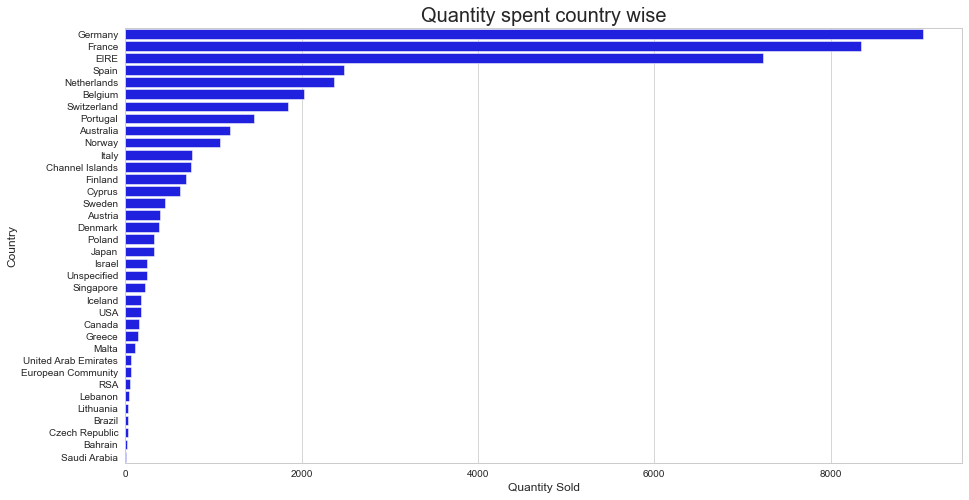

In [73]:
#Let's remove UK to remove it's disporportionate influence
df_withoutUK = group_country.reset_index().sort_values('InvoiceNo',ascending = False).iloc[-36:]
plt.subplots(figsize=(15,8))
#df_withoutUK.plot(kind = 'barh', fontsize = 12, figsize=(15,8))
sns.barplot(x = 'InvoiceNo' , y = 'Country' , color = 'blue', data = df_withoutUK)
plt.xlabel('Quantity Sold')
plt.title('Quantity spent country wise', fontsize = 20)

In [87]:
Revenue_Country = df.groupby('Country')['AmountSpent'].sum().reset_index().sort_values('AmountSpent', ascending = False)
Revenue_Country

,Country,AmountSpent
35,United Kingdom,7.308392e+06
23,Netherlands,2.854463e+05
10,EIRE,2.655459e+05
14,Germany,2.288671e+05
13,France,2.090240e+05
0,Australia,1.385213e+05
30,Spain,6.157711e+04
32,Switzerland,5.644395e+04
3,Belgium,4.119634e+04
31,Sweden,3.837833e+04


Text(0.5, 1.0, 'Revenue by country')

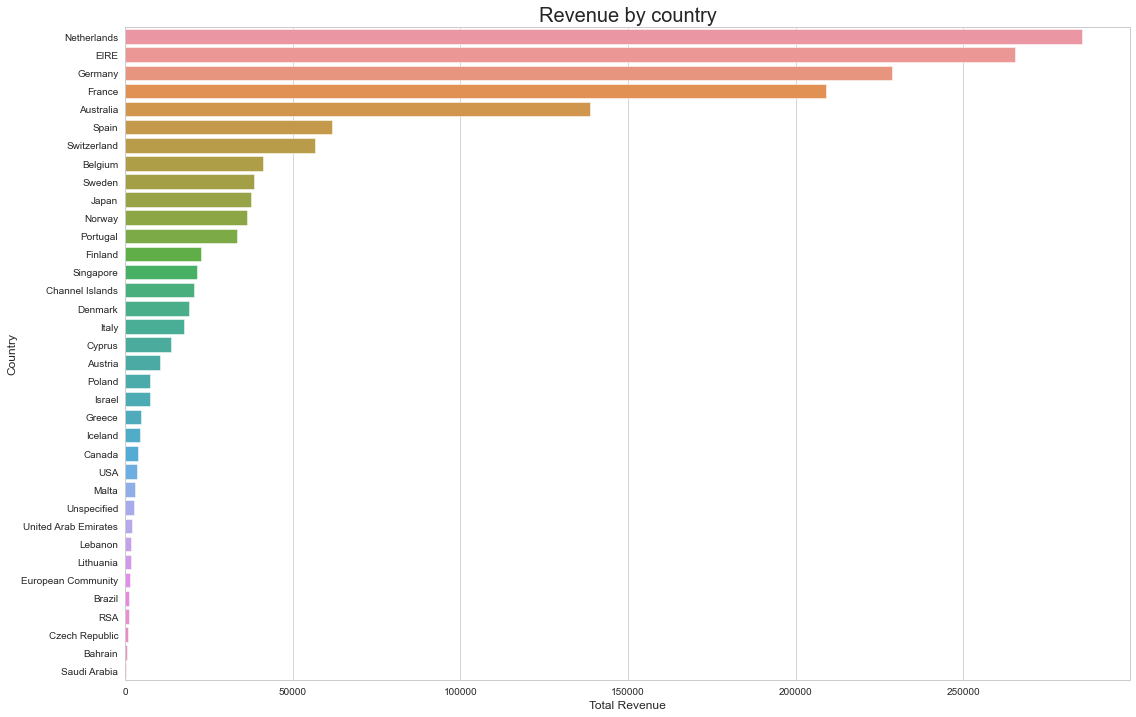

In [89]:
#Let's remove UK to remove it's disporportionate influence
Rev_Cntry_No_UK = Revenue_Country[Revenue_Country.Country!='United Kingdom']
plt.subplots(figsize=(18,12))
#df_withoutUK.plot(kind = 'barh', fontsize = 12, figsize=(15,8))
sns.barplot(x = 'AmountSpent' , y = 'Country' , data = Rev_Cntry_No_UK)
plt.xlabel('Total Revenue')
plt.title('Revenue by country', fontsize = 20)

## Repeat Customers

In [91]:
# Get our date range for our data
print('Date Range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [92]:
# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df = df[df['InvoiceDate']<'2011-12-01']

In [93]:
# Get total amount spent per invoice and associate it with CustomerID and Country
amount_invoice_df = df.groupby(['InvoiceNo','InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max, 'Country': max})

In [96]:
amount_invoice_df = amount_invoice_df.reset_index()

In [97]:
amount_invoice_df

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom
...,...,...,...,...,...
17783,579868,2011-11-30 16:43:00,328.32,15544,United Kingdom
17784,579870,2011-11-30 16:47:00,292.41,12437,France
17785,579872,2011-11-30 16:54:00,278.82,14085,United Kingdom
17786,579881,2011-11-30 17:22:00,905.52,12429,Denmark


In [123]:
# Sort on Amount spent, this gives us the largest invoices
amount_invoice_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [110]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)
monthly_repeat_customers_df = amount_invoice_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(
lambda x: len(x)>1).resample('M').nunique()['CustomerID']
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [108]:
# Number of Unique customers per month
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [112]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = round(monthly_repeat_customers_df/monthly_unique_customers_df*100.0,2)
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.72
2011-01-31    20.65
2011-02-28    20.18
2011-03-31    20.84
2011-04-30    19.86
2011-05-31    26.61
2011-06-30    22.20
2011-07-31    23.92
2011-08-31    21.18
2011-09-30    21.48
2011-10-31    23.75
2011-11-30    32.49
Freq: M, Name: CustomerID, dtype: float64

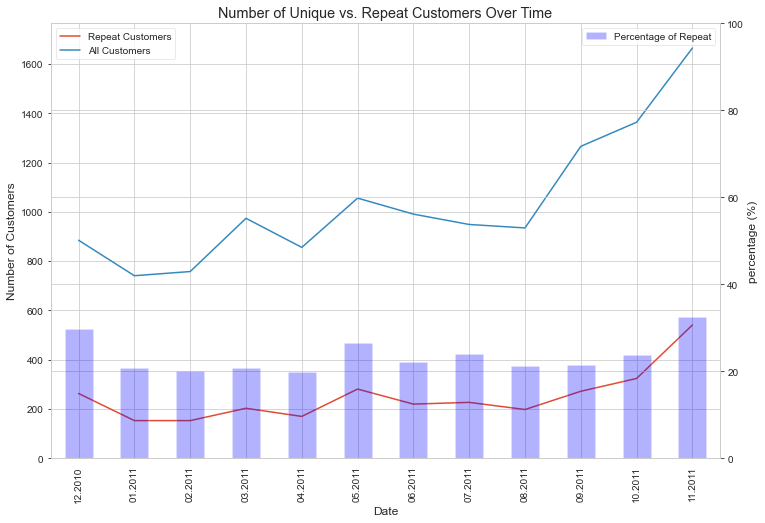

In [127]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [128]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue_df = df.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

In [130]:
monthly_rev_repeat_customers_df = amount_invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

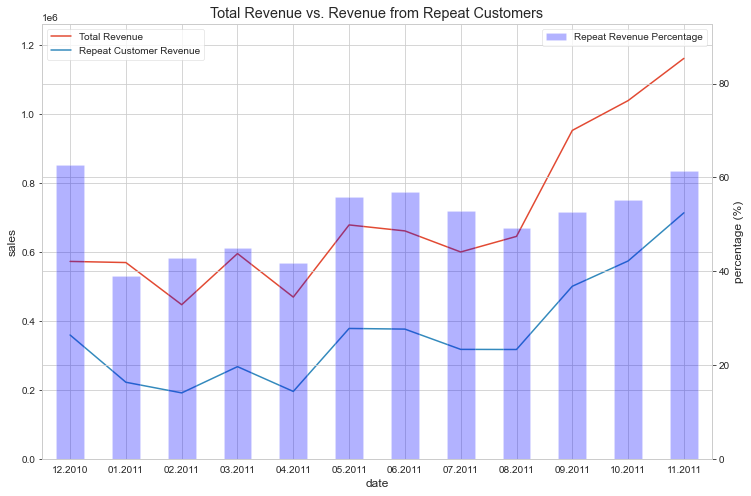

In [131]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

In [132]:
# Now let's get quantity of each item sold per month
date_item_df = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [133]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


In [134]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         1697
             22197         2110
             84826          366
             85099B        2056
2011-01-31   22197         1697
             84826          480
             85099B        2625
2011-02-28   22086            2
             22197         2505
             84826           66
             85099B        2971
2011-03-31   22086           85
             22197         2034
             84826           60
             85099B        4924
2011-04-30   22086           11
             22197         1801
             84826            1
             85099B        2211
2011-05-31   22086           12
             22197         6738
             23084         1097
             85099B        3470
2011-06-30   22086          337
             22197         1989
             23084         1621
             84826            1
             85099B        3529
2011-07-31   22086          374
             22197         1787
             2308

In [135]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1697.0,2110.0,0.0,366.0,2056.0
2011-01-31,0.0,1697.0,0.0,480.0,2625.0
2011-02-28,2.0,2505.0,0.0,66.0,2971.0
2011-03-31,85.0,2034.0,0.0,60.0,4924.0
2011-04-30,11.0,1801.0,0.0,1.0,2211.0
2011-05-31,12.0,6738.0,1097.0,0.0,3470.0
2011-06-30,337.0,1989.0,1621.0,1.0,3529.0
2011-07-31,374.0,1787.0,236.0,2.0,2970.0
2011-08-31,480.0,5286.0,1813.0,72.0,5278.0


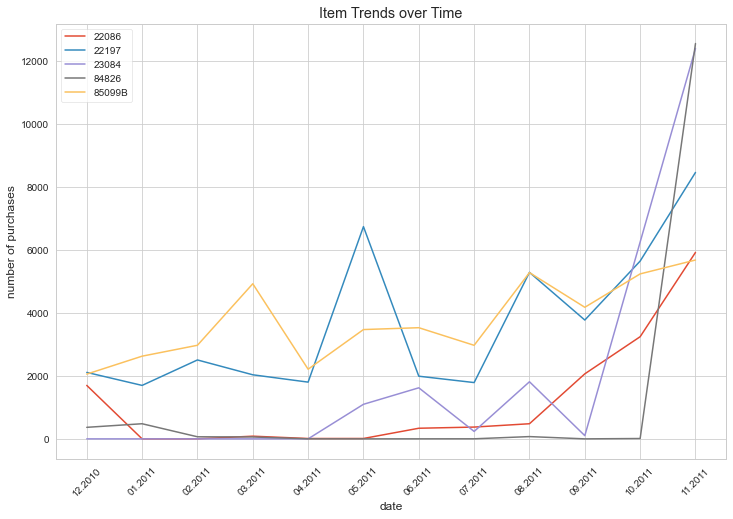

In [136]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()